
###### Question 1

Explore the data and answer the following:
What type of attributes of the data?
Explore the data to check, whether is it balance?
Using a scatter plot, what pattern can you see? Why?
What attribute is useful and what is not? why?

###### Question 2
Experiment with Naive Bayes classifier introduced in this lab to predict the class of your dataset. Use default parameter configurations. Do data split and
cross-validation as necessary. In addition, compare your results that you obtain using KNN and Decision Tree classifiers on the same data using their
default parameter. Answer the following questions:
Compare their accuracy. How much they differ between each other?
Why their performance (accuracy) differ? Explain using any of the evaluation metrices (i.e. confusion matrix, precision, recall, etc.)

# Step 2: Data Understanding

In [1]:
# Import important libarery 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# import dataset and add columm names to the imporated dataset

colName = ['buying','maintenance','doors','persons','luggage boot','safety','class']
data = pd.read_csv('https://raw.githubusercontent.com/abdo-projects/data-science-portfolio/main/Dataset/car.csv', names = colName)

# Show the the tope 5 obersrvation of the dataset
display(data.head(5))

#Show data desccription
display(data.describe())

#show data shape
display(data.shape)

# show data type

display(data.dtypes)

,buying,maintenance,doors,persons,luggage boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


,buying,maintenance,doors,persons,luggage boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


(1728, 7)

buying          object
maintenance     object
doors           object
persons         object
luggage boot    object
safety          object
class           object
dtype: object

- Because all data attributes are categorical, in order to plot heat map, it has to be encoded into numerical attributes as heat map plot only accept clean numerical attribute   

In [2]:
# sum of null data based on attributes. In this case 3 column have missing values; (Age, Cabin, and Embarked)
data.isnull().sum()


buying          0
maintenance     0
doors           0
persons         0
luggage boot    0
safety          0
class           0
dtype: int64

- there are no null value in the dataset 

In [3]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#data_enc=data.apply(LabelEncoder().fit_transform)

# Create an empty DataFram
column_names = []
data_enc = pd.DataFrame(columns = column_names)

# Convert categorical variable to numeric
data_enc["buying"] = np.where(data["buying"]=="low",0,np.where(data["buying"]=="med",1,np.where(data["buying"]=="high",2,3)))
data_enc["maintenance"] = np.where(data["maintenance"]=="low",0,np.where(data["maintenance"]=="med",1,np.where(data["maintenance"]=="high",2,3)))
data_enc["doors"] = np.where(data["doors"]=="2",0,np.where(data["doors"]=="3",1,np.where(data["doors"]=="4",2,3)))
data_enc["persons"] = np.where(data["persons"]=="2",0,np.where(data["persons"]=="4",1,2))
data_enc["luggage boot"] = np.where(data["luggage boot"]=="small",0,np.where(data["luggage boot"]=="med",1,2))
data_enc["safety"] = np.where(data["safety"]=="low",0,np.where(data["safety"]=="med",1,2))
data_enc["class"] = np.where(data["class"]=="unacc",0,np.where(data["class"]=="acc",1,np.where(data["class"]=="good",2,3)))


(7.5, -0.5)

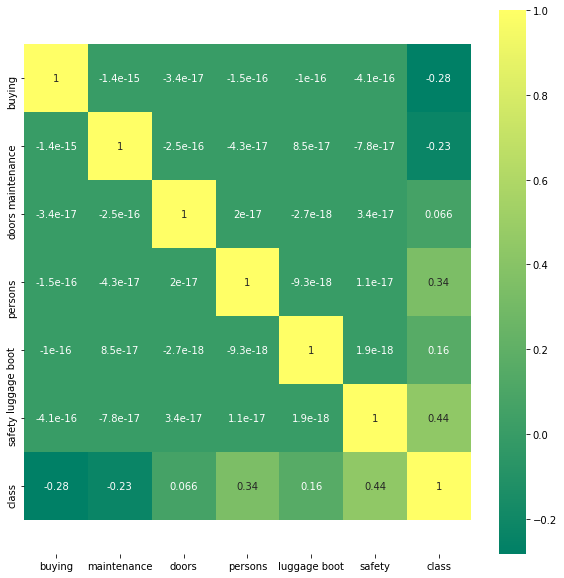

In [4]:
# correlations using heat map plot
plt.figure(figsize=(10,10))
ax = sns.heatmap(data_enc.corr(),annot=True,cmap='summer', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


- The heat map plot shows no correlation between attributes     

<AxesSubplot:xlabel='class', ylabel='count'>

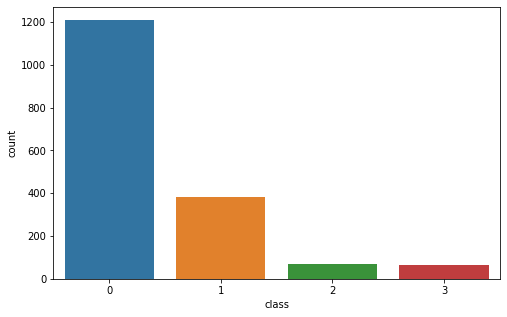

In [5]:
plt.figure(figsize=(8,5))

# count rows of each classes

sns.countplot(x=data_enc["class"], data=data_enc)

- The figure shows clearly that the class is not evenly distributed with value “unacc” has the highest count, which indicates that the dataset has imbalanced class distribution.Imbalanced class distribution will result in Imbalanced Classification a predictive modeling issue where the distribution of observations across the classes are not equal.



C:\Users\a7med\anaconda3\envs\Main_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\a7med\anaconda3\envs\Main_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\a7med\anaconda3\envs\Main_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

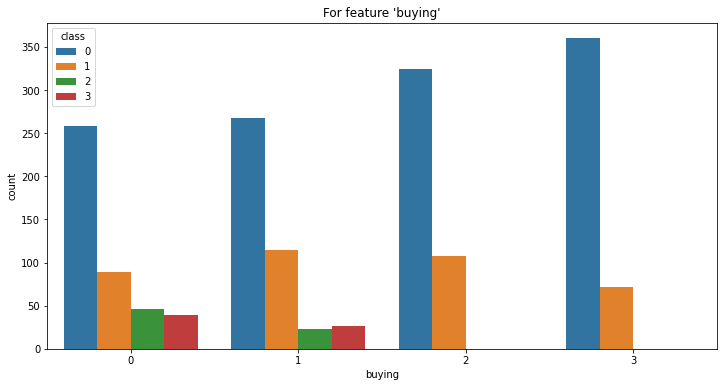

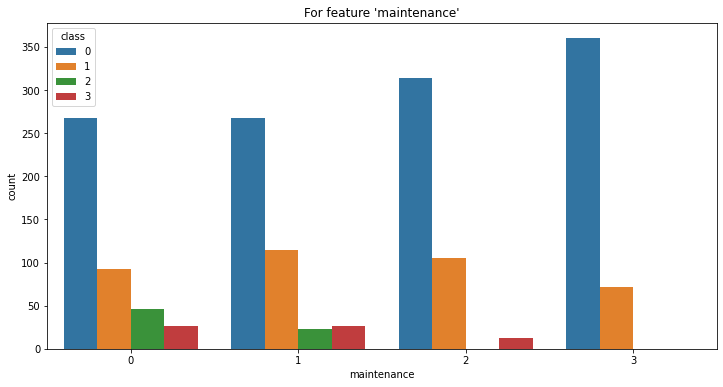

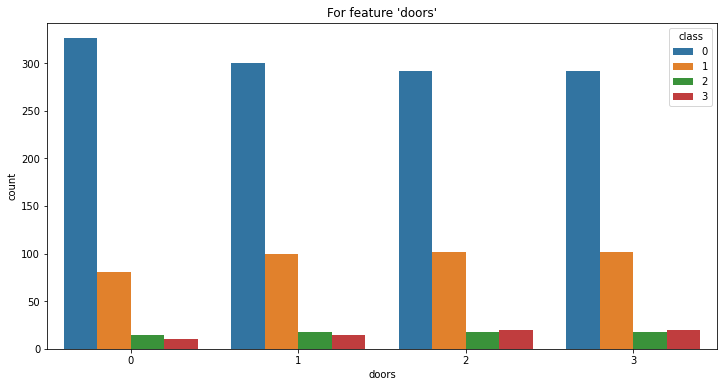

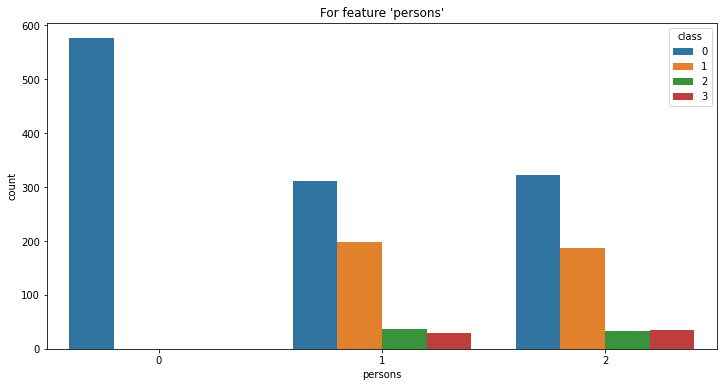

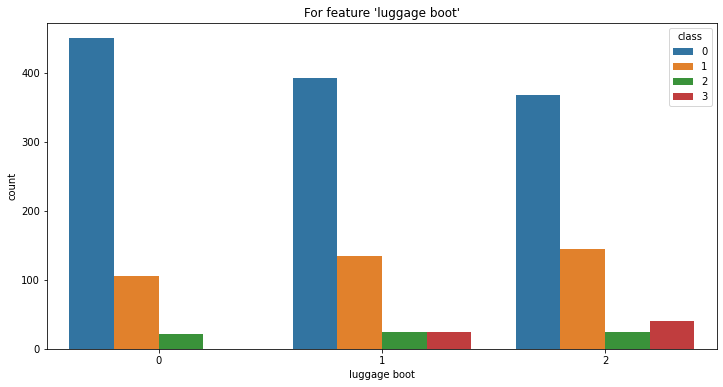

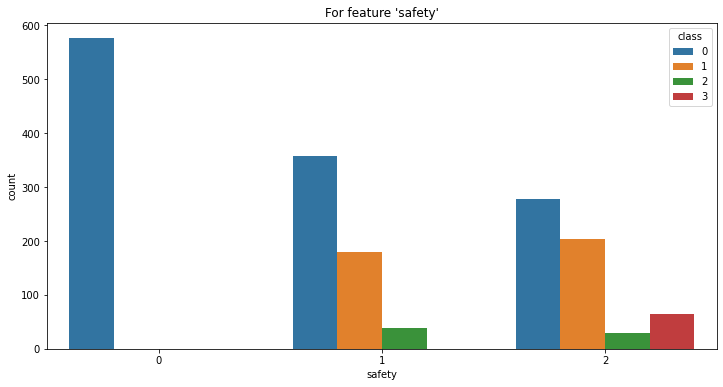

In [6]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data_enc[i],hue=data_enc['class'])


- From all the above outputs, it is clear that all the attributes except the label are distributed equally among data. However, class distribution for each feature is not equal.

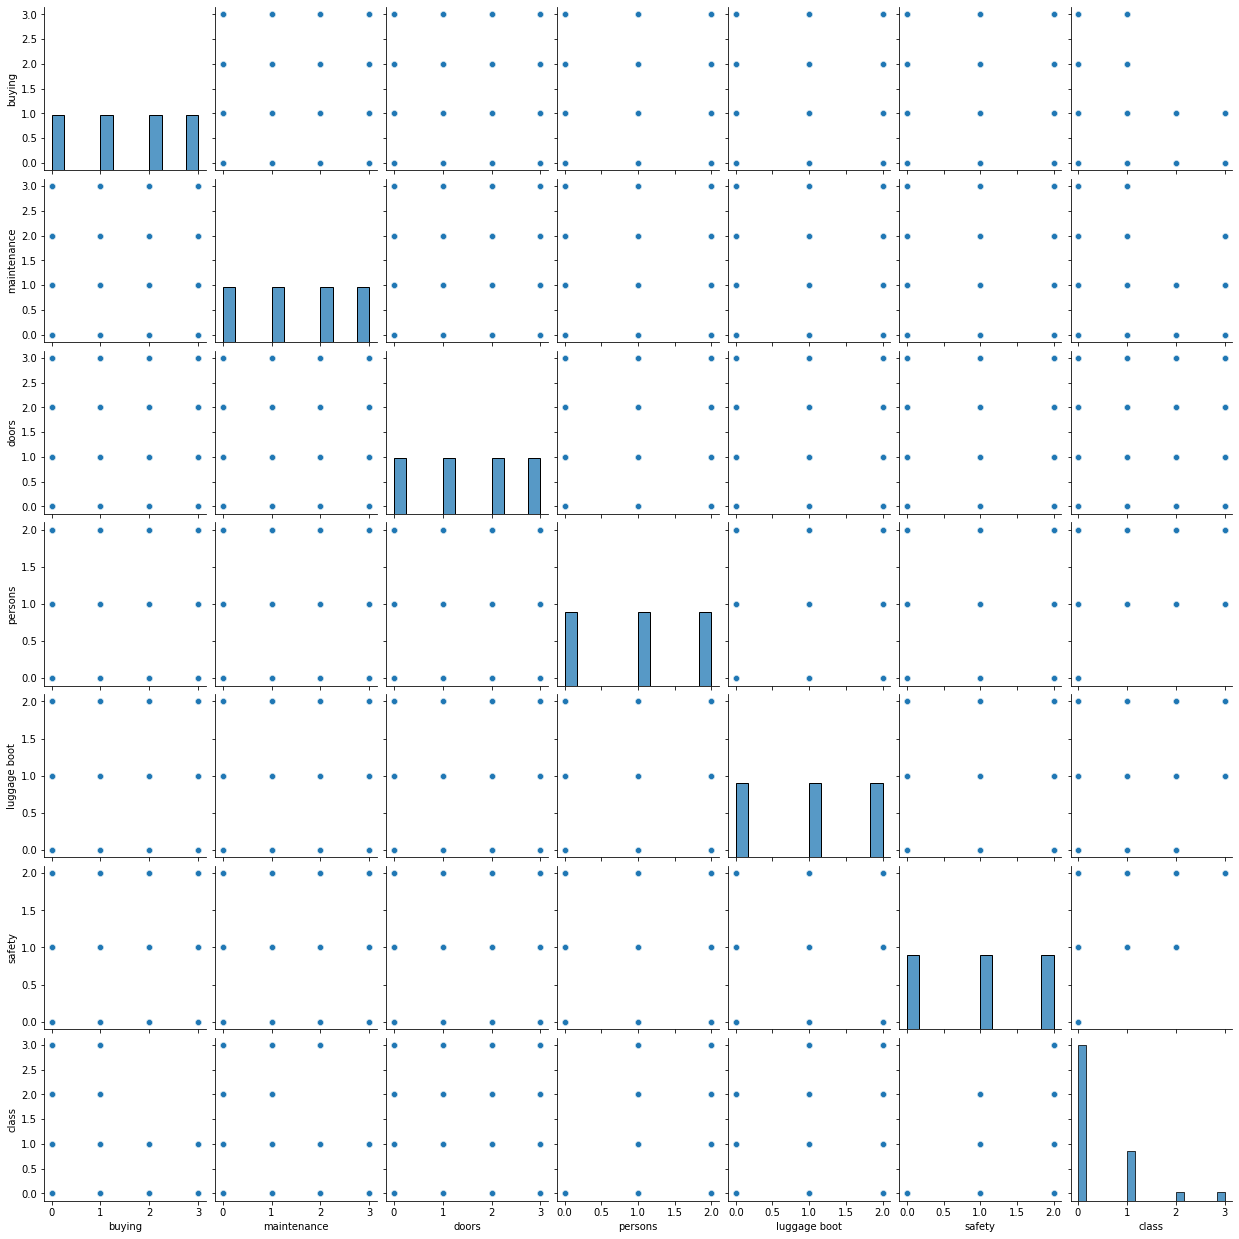

In [7]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

# without regression
sns.pairplot(data_enc, kind="scatter")
plt.show()


C:\Users\a7med\anaconda3\envs\Main_ml\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


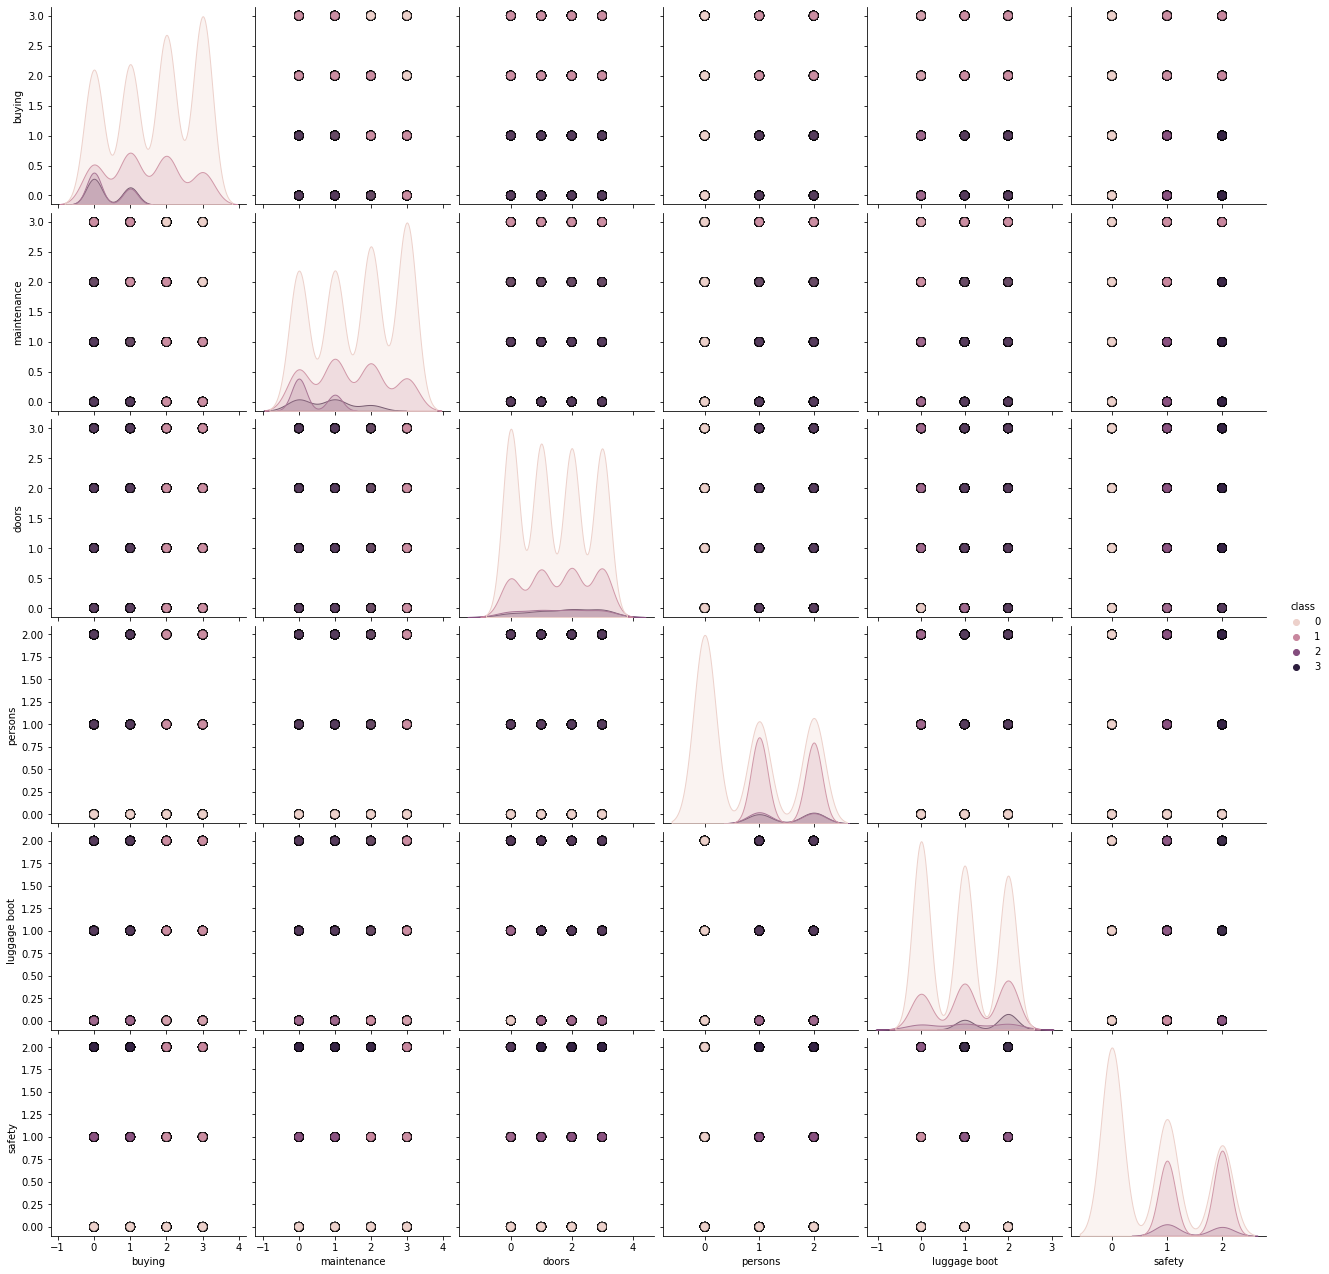

In [8]:
# Seaborn visualization library
import seaborn as sns

# Create a pair plot colored by continent with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(data_enc, hue = 'class', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 3)

- scatterplot confirms it is clear that all the attributes except the label are distributed equally among data.

## Question 1 answers



###### Explore the data and answer the following:
###### What type of attributes of the data?
all the attributes are categorical ordinal
###### Explore the data to check, whether is it balance?
The figure shows clearly that the class is not evenly distributed with value “unacc” has the highest count, which indicates that the dataset has imbalanced class distribution.Imbalanced class distribution will result in Imbalanced Classification a predictive modeling issue where the distribution of observations across the classes are not equal.
###### Using a scatter plot, what pattern can you see? Why?
scatterplot confirms it is clear that all the attributes except the label are distributed equally among data.
###### What attribute is useful and what is not? why?
all attributes do not have high correlation with target class,however we are using all attributes because the low number of attributes

In [9]:
X = data_enc.iloc[:,:-1] # Select all attributes that was cleaned and turned into numerical values
y = data_enc.iloc[:,-1:] # Classification on care 'class' (target attribute)
display(X.shape)
display(y.shape)

(1728, 6)

(1728, 1)

In [10]:
#Import train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split
# split the data into training set and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(1209, 6)

(519, 6)

(1209, 1)

(519, 1)

Number of mislabeled points out of a total 519 points : class    151
dtype: int64, performance 70.91%
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       368
           1       0.63      0.20      0.30       111
           2       0.43      0.14      0.21        22
           3       0.18      1.00      0.31        18

    accuracy                           0.71       519
   macro avg       0.52      0.55      0.42       519
weighted avg       0.77      0.71      0.70       519

The Cross valadtion score is:  0.7038818970542848


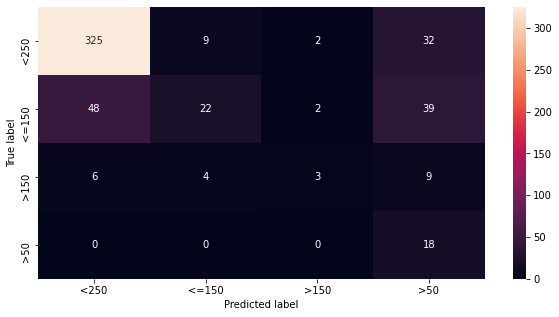

In [11]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Instantiate the classifier
gnb = GaussianNB()
#bnb = BernoulliNB()
#mnb = MultinomialNB()
# Train classifier
gnb.fit(x_train,y_train.values.ravel())
#bnb.fit(x_train,y_train)
#mnb.fit(x_train,y_train)
# Test the classifier
predict_c = gnb.predict(x_test)
#predict = bnb.predict(x_test)
#predict = mnb.predict(x_test)
predict=predict_c.reshape(519 ,1)


# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%".format(x_test.shape[0], (y_test != predict).sum(),gnb.score(x_test,y_test)*100 ))
# Creates a confusion matrix

#gnb.score((x_test,y_test)*100) 
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict_c)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['<250','<=150','>150','>50'],
columns = ['<250','<=150','>150','>50'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_test,predict,labels=np.unique(predict)))
score = cross_val_score(gnb, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("The Cross valadtion score is: ",score.mean())


Number of mislabeled points out of a total 519 points : class    95
dtype: int64, performance 81.70%
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       368
           1       0.59      0.68      0.63       111
           2       0.55      0.27      0.36        22

   micro avg       0.82      0.85      0.83       501
   macro avg       0.68      0.63      0.64       501
weighted avg       0.82      0.85      0.83       501

The Cross valadtion score is:  0.79571002366174


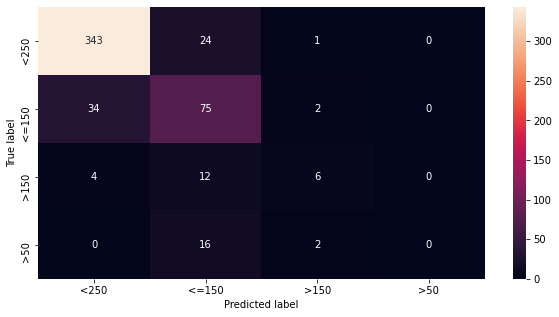

In [12]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Instantiate the classifier
#gnb = GaussianNB()
bnb = BernoulliNB()
#mnb = MultinomialNB()
# Train classifier
#gnb.fit(x_train,y_train.values.ravel())
bnb.fit(x_train,y_train.values.ravel())
#mnb.fit(x_train,y_train)
# Test the classifier
#predict = gnb.predict(x_test)
predict_c = bnb.predict(x_test)
#predict = mnb.predict(x_test)
predict=predict_c.reshape(519 ,1)


# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%".format(x_test.shape[0], (y_test != predict).sum(),bnb.score(x_test,y_test)*100 ))
# Creates a confusion matrix

#gnb.score((x_test,y_test)*100) 
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict_c)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['<250','<=150','>150','>50'],
columns = ['<250','<=150','>150','>50'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_test,predict,labels=np.unique(predict)))
score = cross_val_score(bnb, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("The Cross valadtion score is: ",score.mean())


Number of mislabeled points out of a total 519 points : class    149
dtype: int64, performance 71.29%
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       368
           1       0.17      0.04      0.06       111
           2       0.67      0.09      0.16        22

   micro avg       0.71      0.74      0.73       501
   macro avg       0.53      0.37      0.36       501
weighted avg       0.61      0.74      0.64       501

The Cross valadtion score is:  0.7088474332155962


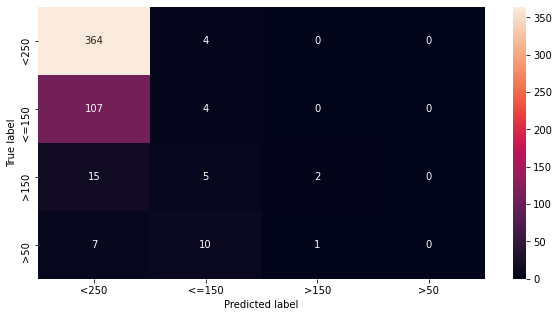

In [13]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Instantiate the classifier
#gnb = GaussianNB()
#bnb = BernoulliNB()
mnb = MultinomialNB()
# Train classifier
#gnb.fit(x_train,y_train.values.ravel())
#bnb.fit(x_train,y_train.values.ravel())
mnb.fit(x_train,y_train.values.ravel())
# Test the classifier
#predict = gnb.predict(x_test)
#predict = bnb.predict(x_test)
predict_c = mnb.predict(x_test)
predict=predict_c.reshape(519 ,1)


# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%".format(x_test.shape[0], (y_test != predict).sum(),mnb.score(x_test,y_test)*100 ))
# Creates a confusion matrix

#gnb.score((x_test,y_test)*100) 
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict_c)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['<250','<=150','>150','>50'],
columns = ['<250','<=150','>150','>50'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_test,predict,labels=np.unique(predict)))
score = cross_val_score(mnb, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("The Cross valadtion score is: ",score.mean())

## Question 2
Experiment with Naive Bayes classifier introduced in this lab to predict the class of your dataset. Use default parameter configurations. Do data split and
cross-validation as necessary. In addition, compare your results that you obtain using KNN and Decision Tree classifiers on the same data using their
default parameter. Answer the following questions:
###### Compare their accuracy. How much they differ between each other?
All 3 implementations GaussianNB, BernoulliNB and MultinomialNB of Naive bayesian has lower accuracy than decision tree and k-nn for the same dataset.
###### Why their performance (accuracy) differ? Explain using any of the evaluation metrices (i.e. confusion matrix, precision, recall, etc.)
Confusion matrix for shows that the 3 implementations GaussianNB, BernoulliNB and MultinomialNB of Naïve Bayesian suffers from low precision and recall unlike decision trees and KNN for the same dataset. In addition, BernoulliNB and MultinomialNB Bayesian failed to find the precision and recall for some of the class targets; so we can conclude that imbalanced dataset affects the accuracy of Naïve Bayesian classifier